In [1]:
include("../../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using Plots
using DifferentialEquations
using .JuliaMBD
using .JuliaMBD.Diagram

In [3]:
@model S1 begin
    @block begin
        in1 = Inport(:in1)
        int1 = Integrator()
        out1 = Outport(:out1)
    end
    @connect begin
        in1.out => int1.in
        int1.out => out1.in
    end
end

S1 (generic function with 1 method)

In [4]:
@model TestS1 begin
    @block begin
        ram1 = Ramp(slope=1)
        s = S1()
    end
    @connect begin
        ram1.out => s.in1
    end
    @scope begin
        s.in1 => in
        s.out1 => out
    end
end


TestS1 (generic function with 1 method)

In [5]:
b = TestS1()

"Block(TestS1)"

In [6]:
b.inports

Main.JuliaMBD.AbstractInPort[]

In [7]:
m = @compile TestS1()

Main.JuliaMBD.ODEModel("Block(TestS1)", var"#13#14"(), var"#15#16"(), var"#17#18"(), var"#19#23"())

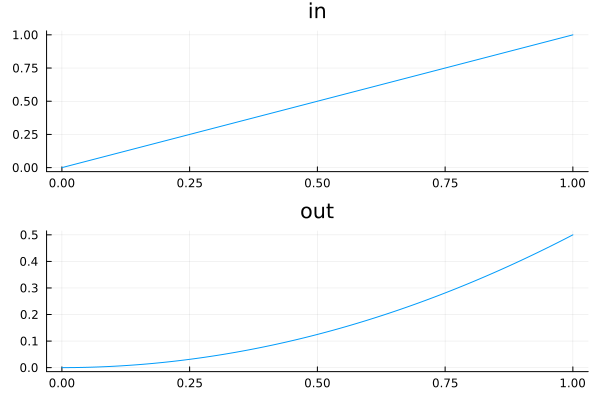

In [8]:
res = simulate(m, tspan=[0,1])
plot(res)

In [32]:
@model pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount
        I_ENG2Rr_ENG_mount
        i_center_ENG
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "pitch_rate")
end


pitch_rate (generic function with 1 method)

In [34]:
@model Test_pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0.1
        I_ENG2Rr_ENG_mount = 0.4
        i_center_ENG = 1000
    end
    @block begin
        p = pitch_rate(I_ENG2Fr_ENG_mount=I_ENG2Fr_ENG_mount, I_ENG2Rr_ENG_mount=I_ENG2Rr_ENG_mount, i_center_ENG=i_center_ENG)
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
    end
end


Test_pitch_rate (generic function with 1 method)

In [16]:
b = Test_pitch_rate()

"Block(Test_pitch_rate)"

In [21]:
eval(JuliaMBD.expr_sfunc(b))

Test_pitch_rate_sfunc (generic function with 1 method)

In [22]:
Test_pitch_rate_sfunc(0)

(NaN,)

In [17]:
m = @compile b

Main.JuliaMBD.ODEModel("Block(Test_pitch_rate)", var"#76#78"(), var"#79#80"(), var"#81#82"(), var"#83#88"())

In [18]:
simulate(m, tspan=[0,100])

┌ Warning: Automatic dt set the starting dt as NaN, causing instability. Exiting.
└ @ OrdinaryDiffEq /root/.julia/packages/OrdinaryDiffEq/yppG9/src/solve.jl:562
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase /root/.julia/packages/SciMLBase/szsYq/src/integrator_interface.jl:574


Main.JuliaMBD.SimulationResult((0.1, 0.4, 1000), LinRange{Float64}(0.0, 100.0, 1000), (in1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  445.49549549549545, 445.995995995996, 446.49649649649655, 446.996996996997, 447.49749749749753, 447.997997997998, 448.49849849849846, 448.998998998999, 449.4994994994995, 450.0], in2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1336.4864864864865, 1337.987987987988, 1339.4894894894896, 1340.990990990991, 1342.4924924924926, 1343.993993993994, 1345.4954954954953, 1346.996996996997, 1348.4984984984985, 1350.0], out1 = [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]), ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Float64, Float64, Int64}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionW